In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

plt.rc('font', family='Malgun Gothic')  # 폰트 지정
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'  # 그래프 글씨 뚜렷

In [34]:
df_train = pd.read_csv("../data/df_train_004.csv")
df_test = pd.read_csv("../data/df_test_004.csv")

df_train['target'] = df_train['사망자수']*10 + df_train['중상자수']*5 + df_train['경상자수']*3 + df_train['부상자수']
df_train.drop(columns = ['사망자수','중상자수','경상자수','부상자수'], axis=1, inplace = True)

In [35]:
X = df_train.drop(columns = 'target',axis=1)
y = df_train['target']

In [36]:
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state=42 )

In [37]:
import os
import random

In [38]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

# plzplz

In [1]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[33]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(60),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(20),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(10),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(1, activation='softplus')
])

NameError: name 'tf' is not defined

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0014), loss='mean_squared_logarithmic_error', metrics=['mse'])

In [54]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss')

In [55]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, callbacks=early_stopping)

Epoch 1/20
867/867 [==============================] - 3s 3ms/step - loss: 0.1998 - mse: 10.1691 - val_loss: 0.1992 - val_mse: 10.6995
Epoch 2/20
867/867 [==============================] - 2s 2ms/step - loss: 0.1996 - mse: 10.1643 - val_loss: 0.1985 - val_mse: 10.8075
Epoch 3/20
867/867 [==============================] - 2s 2ms/step - loss: 0.1998 - mse: 10.1610 - val_loss: 0.1983 - val_mse: 10.7352


In [56]:
sub_file = pd.read_csv("../data/sample_submission.csv")

In [57]:
sub_file['ECLO'] = model.predict(df_test)

343/343 [==============================] - 0s 1ms/step


In [59]:
sub_file.to_csv("../data/sub_file/017not_round_softplus.csv", index=False)

<AxesSubplot:>

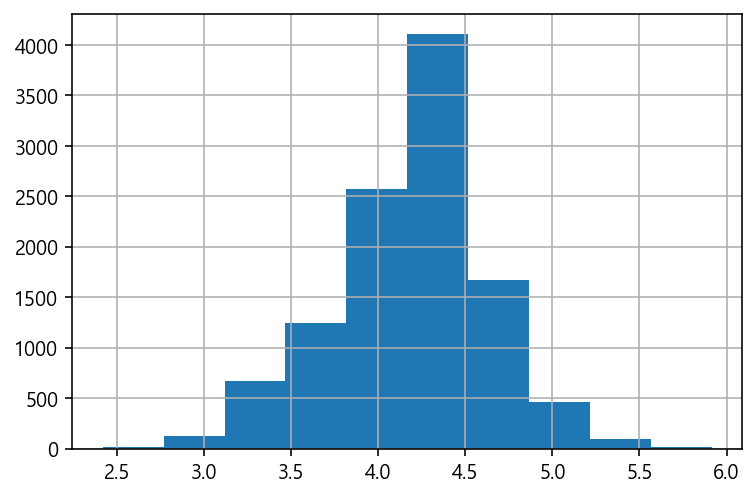

In [60]:
sub_file.ECLO.hist()